In [1]:
# Comparing classification algorithms for assignment of chemical compounds into different classes

In [2]:
# The goal of computer-aided drug design is identification of 
# novel compounds active against selected protein targets. In general, 
# all ligand-based virtual screening methods are based on the searching of 
# ligand similarity by comparison molecular structure descriptors and properties. 
# Here, I will show how to use chemical descriptor in categorising molecules 
# based on their biological functions. These features can classify compounds 
# that are diverse in substructure but nonetheless bind to the same 
# macromolecular binding sites, and can therefore be used to prepare molecular 
# databases for high-throughput and virtual screening.

# We will implement the most common classification algorithms in scikit-learn and
# compare their performance.

# The following algorithms will be compared:

# - Naive Bayes
# - Support Vector Machine
# - Logistic Regression
# - K-Nearest Neighbors
# - Linear Discriminant Analysis
# - Support Vector Machine
# - Decision Tree Classifier

# The dataset and chemical descriptors are described in my article [link.....], where 
# I used a linear discriminant analysis to assign chemical compounds into 7 different 
# classes.
# Here we will use a smaller dataset containing 45 molecules that are known to bind
# the cyclooxygenase 1 (COX1) enzyme, 59 molecules that bind HIV-1 protease and 41 molecules bind 
# Cytochrome C peroxidase enzyme.
# Our dataset has three classes and eight numeric input variables (chemical descriptors) of varying scales.

In [3]:
# Let's load an input data and print the first 5 elements. The molecules binding COX-1 enzyme have class label '1',
# the molecules binding HIV-1 protease have class label '2' and molecules binding Cytochrome C peroxidase enzyme has
# class label '3'. The eight chemical descriptors labeled as D1-D8.

In [4]:
import pandas as pd
#url = 'https://raw.github'
data = pd.read_csv('Dataset_COX-1_HIV-1_Cyt.csv')
data[0:5]

,D1,D2,D3,D4,D5,D6,D7,D8,Class
0,21.996307,119.300545,42,-0.129873,-0.461116,2.354662,0.739296,0.475639,1
1,18.002651,111.988098,38,-0.192031,-0.003431,0.010324,0.772352,0.479507,1
2,26.002590,196.702667,56,0.012251,-0.149585,0.937021,0.546386,0.348632,1
3,22.004517,119.300545,42,-0.103873,-0.357562,1.760567,0.720476,0.462141,1
4,23.003124,169.373093,50,-0.161954,-0.516773,2.444123,0.743189,0.451499,1


In [5]:
# So, let's create two variable X and Y. The X variable will contain all chemical descriptors and 
# Y will contain class labels.

In [6]:
val = data.values
X = val[:,0:8]
Y = val[:,8]

In [7]:
# Let's train the model on 80% of the data and leave 20% for validation.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 650)

In [24]:
# Let’s start by importing required classifiers.

In [25]:
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [26]:
# Let's prepare models, and train each model with a 10-fold cross-validation.

In [33]:
seed = 15
models = []
names = []
results = []
scoring = 'accuracy'
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='linear')))
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cross_val = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cross_val)
    names.append(name)
    msg = "%s: %f SD:%f" % (name, cross_val.mean(), cross_val.std())
    print(msg)

LR: 0.948485 SD:0.058564
LDA: 0.990909 SD:0.027273
KNN: 0.965152 SD:0.058994
DT: 0.965909 SD:0.041804
NB: 0.965909 SD:0.041804
SVM: 0.957576 SD:0.042478


In [28]:
# As we can see LDA outperforms other models. Let's visualize the results of each model.

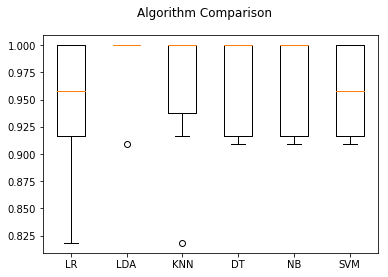

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [70]:
# Make predictions on validation dataset
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_test)
print(round(accuracy_score(Y_test, predictions),4))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9655
[[12  0  1]
 [ 0 10  0]
 [ 0  0  6]]
             precision    recall  f1-score   support

        1.0       1.00      0.92      0.96        13
        2.0       1.00      1.00      1.00        10
        3.0       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        29



In [31]:
# From the confusion matrix (first row) we can see that 12 molecules binding COX-1 were classified correctly and
# one molecule was incorrectly classified because it was assigned to class 3. 
# All 10 molecules binding HIV-1 protease (row 2) and all 6 molecules binding Cytochrome C peroxidase enzyme (row 3)
# were classified correctly.